In [1]:
from deep_learning_models import *
from helper.dataset_reader import read_tsv
from helper.data_transformer import *
from sklearn.model_selection import train_test_split
from utils import *
import pandas as pd

In [2]:
print('Tensorflow version:', tf.__version__)
print('GPU detected:', tf.config.list_physical_devices('GPU'))

Tensorflow version: 2.9.0
GPU detected: []


In [3]:
data = read_tsv('../../dataset/comlid-data-140422-v1.tsv')

In [4]:
all_data, all_words, all_tags = data

In [5]:
df = list_to_dataframe(data)

In [6]:
words = get_unique_words(df)
tags = get_unique_tags(df)
chars = set([w_i for w in words for w_i in w])

In [7]:
dt_pair = to_token_tag_list(data)

In [8]:
X_word, X_char, y, idx_word, idx_tag = input_data_wc_embd(words, tags, dt_pair)

In [9]:
X_word_train, X_word_test, y_train, y_test = train_test_split(X_word, y, test_size=0.33, random_state=1)
X_char_train, X_char_test, _, _ = train_test_split(X_char, y, test_size=0.33, random_state=1)

In [10]:
num_words = len(words)
num_tags = len(tags)
num_char = len(chars)
max_len = 100
max_len_char = 10
model = wc_blstm_model(num_words, num_tags, num_char, max_len, max_len_char)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100, 10)]    0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 time_distributed (TimeDistribu  (None, 100, 10, 10)  5570       ['input_2[0][0]']                
 ted)                                                                                             
                                                                                                  
 embedding (Embedding)          (None, 100, 50)      1344600     ['input_1[0][0]']            

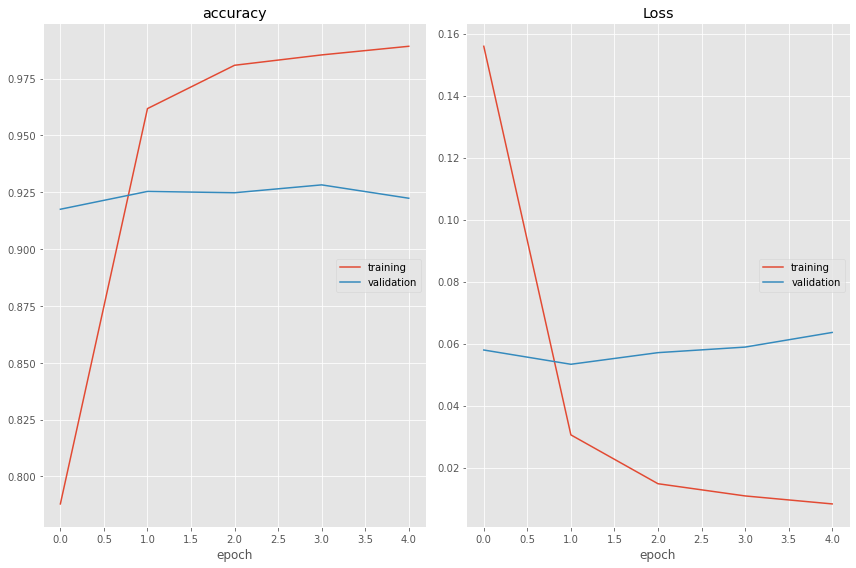

accuracy
	training         	 (min:    0.788, max:    0.989, cur:    0.989)
	validation       	 (min:    0.918, max:    0.928, cur:    0.922)
Loss
	training         	 (min:    0.008, max:    0.156, cur:    0.008)
	validation       	 (min:    0.053, max:    0.064, cur:    0.064)

Epoch 5: val_loss did not improve from 0.05333
102/102 [==============================] - 21s 204ms/step - loss: 0.0083 - accuracy: 0.9893 - val_loss: 0.0636 - val_accuracy: 0.9224


In [11]:
root_path = 'model/'
model_name = 'wc_blstm_model.h5'
wc_embd_model_fitting(model, root_path, model_name, X_word_train, X_char_train, y_train, num_epoch=5, batch_sz=32, max_len=max_len, max_len_char=max_len_char)

In [12]:
from keras.models import load_model

mdl = load_model('model/wc_blstm_model.h5')

In [19]:
i = np.random.randint(0, X_word_test.shape[0]) #659
p = mdl.predict([X_word_test,
                        np.array(X_char_test).reshape((len(X_char_test),
                                                     max_len, max_len_char))])
p = np.argmax(p[i], axis=-1)
y_true = y_test[i]
print("{:30}{:10}\t {}\n".format("Word", "True", "Pred"))
print("-" *60)

for w, true, pred in zip(X_word_test[i], y_true, p):
    if w != 0:
        print("{:30}{:10}\t{}".format(idx_word[w], idx_tag[true], idx_tag[pred]))

56/56 [==============================] - 2s 36ms/step
Word                          True      	 Pred

------------------------------------------------------------
@bhibiet_03                   O         	O
La                            JV        	JV
piye                          JV        	JV
pak                           JV        	JV
maine                         JV        	JV
bosok                         JV        	JV
lo                            JV        	ID
.                             O         	O
Mending                       ID        	ID
persis                        O         	O
seng                          JV        	JV
tahun                         ID        	ID
sebelum-belum                 ID        	ID
e                             JV        	JV
ya                            JV        	JV
pak                           JV        	JV
,                             O         	O
maine                         JV        	JV
genah                         JV        	JV
getih

In [21]:
all_w_pair = []
all_true_pair = []
all_pred_pair = []

for i in range(len(X_word_test)):
    p = mdl.predict([X_word_test,
                        np.array(X_char_test).reshape((len(X_char_test),
                                                     max_len, max_len_char))])
    p = np.argmax(p[i], axis=-1)
    y_true = y_test[i]
    w_pair = []
    true_pair = []
    pred_pair = []
    for w, true, pred in zip(X_word_test[i], y_true, p):
        if w != 0:
            print("{:30}{:10}\t{}".format(idx_word[w], idx_tag[true], idx_tag[pred]))
            w_pair.append(idx_word[w])
            true_pair.append(idx_tag[true])
            pred_pair.append(idx_tag[pred])
    all_w_pair.append(w_pair)
    all_true_pair.append(true_pair)
    all_pred_pair.append(pred_pair)

56/56 [==============================] - 2s 37ms/step
Muleh                         JV        	JV
muleh                         JV        	JV
galon                         JV        	JV
entek                         JV        	JV
.                             O         	O
Well                          EN        	EN
tenan                         JV        	JV
ncene                         JV        	JV
koncoku                       JV        	JV
56/56 [==============================] - 2s 37ms/step
@emonymphreads                O         	O
setau                         ID        	ID
aku                           ID        	ID
di                            ID        	ID
tweet                         EN        	EN
sendiri                       ID        	ID
trs                           ID        	ID
dicopy                        MIX-ID-EN 	MIX-ID-EN
baru                          ID        	ID
nnti                          ID        	ID
di                            ID        	ID
paste  

KeyboardInterrupt: 

In [22]:
true_flat = [item for sublist in all_true_pair for item in sublist]
pred_flat = [item for sublist in all_pred_pair for item in sublist]

              precision    recall  f1-score   support

          ID       0.92      0.97      0.94     11670
          JV       0.89      0.83      0.86      2520
          EN       0.90      0.89      0.90      2985
   MIX-ID-EN       0.94      0.82      0.88       508
   MIX-ID-JV       0.98      0.79      0.87       167
   MIX-JV-EN       0.94      0.83      0.88       126
           O       0.96      0.90      0.93      5370

    accuracy                           0.92     23346
   macro avg       0.93      0.86      0.89     23346
weighted avg       0.92      0.92      0.92     23346



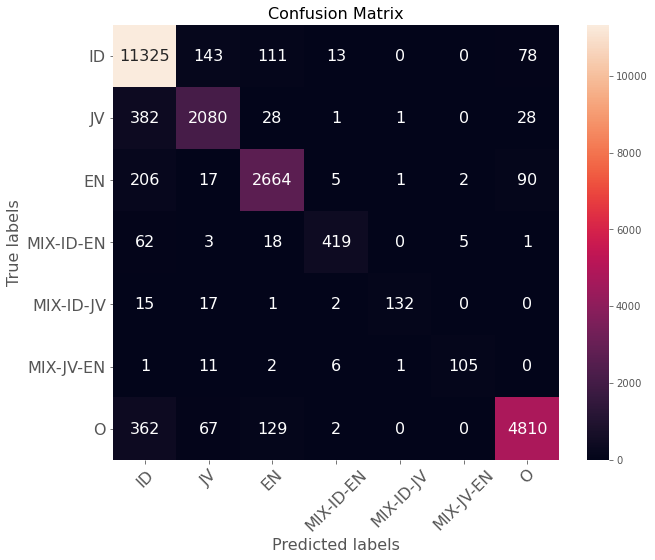

In [23]:
performance_report(true_flat, pred_flat)

In [ ]:
df_ = pd.DataFrame({
    'word': all_w_pair,
    'true': all_true_pair,
    'pred': all_pred_pair
})

In [ ]:
token_true_pred = []
for index, row in df_.iterrows():
    pair = list(zip(row['word'], row['true'], row['pred']))
    token_true_pred.append(pair)

In [ ]:
true_pred_file = 'tagging_result/wc_blstm_compare_results.tsv'
with open(true_pred_file, "a", encoding='utf-8') as f:
    f.write("Word" + "\t" + "True" + "\t" + "Predict" + "\n")
    for index, row in df_.iterrows():
        for tkn, t_true, t_pred in (zip(row['word'], row['true'], row['pred'])):
            f.write(tkn + '\t' + t_true + '\t' + t_pred + '\n')
        f.write('\n')

f.close()